# Prediction of COVID-19 cases timeseries: One PDF output

Import the packages:

In [1]:
import QNPy
from QNPy import PREDICTION_onePDF as prp
from QNPy.PREDICTION_onePDF import *
from QNPy.PREDICTION_onePDF import plot_function

Define torch device:

In [2]:
#defining the device, it can be cpu of cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
device

device(type='cpu')

In [3]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = ".\output\predictions" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [4]:
prp.clear_output_dir(OUTPUT_PATH)#clearing output dir

In [5]:
model = prp.load_model(MODEL_PATH, device)  #loading the model

In [6]:
criterion, mseMetric= prp.get_criteria()#loading criterion and metrics from model

In [7]:
if __name__ == "__main__":
    folder_path = "./dataset/test"
    prp.remove_padded_values_and_filter(folder_path)
    folder_path = "./dataset/train"
    prp.remove_padded_values_and_filter(folder_path)
    folder_path = "./dataset/val"  # Change this to your dataset folder
    prp.remove_padded_values_and_filter(folder_path)

Removed padding in file: 1009_cases_original_split22.csv
Removed padding in file: 1015_cases_original_split31.csv
Removed padding in file: 1047_cases_original_split79.csv
Removed padding in file: 1053_cases_original_split88.csv
Removed padding in file: 1081_cases_original_split130.csv
Removed padding in file: 1097_cases_original_split154.csv
Removed padding in file: 1103_cases_original_split166.csv
Removed padding in file: 1133_cases_original_split211.csv
Removed padding in file: 12009_cases_original_split226.csv
Removed padding in file: 12015_cases_original_split235.csv
Removed padding in file: 12019_cases_original_split241.csv
Removed padding in file: 12055_cases_original_split292.csv
Removed padding in file: 12077_cases_original_split325.csv
Removed padding in file: 12089_cases_original_split346.csv
Removed padding in file: 12097_cases_original_split358.csv
Removed padding in file: 12101_cases_original_split364.csv
Removed padding in file: 12103_cases_original_split367.csv
Removed p

In [8]:
# Load the data
testSet, testLoader=prp.load_test_data(DATA_PATH_TEST)
trainSet, trainLoader=prp.load_train_data(DATA_PATH_TRAIN)
valSet, valLoader = prp.load_val_data(DATA_PATH_VAL)

  0%|          | 0/320 [00:00<?, ?it/s]


OSError: [Errno 22] Invalid argument: './output/predictions/test\\data\\12019_cases_original_split241, loss: -46.2, MSE: 0.03_predictions.csv'

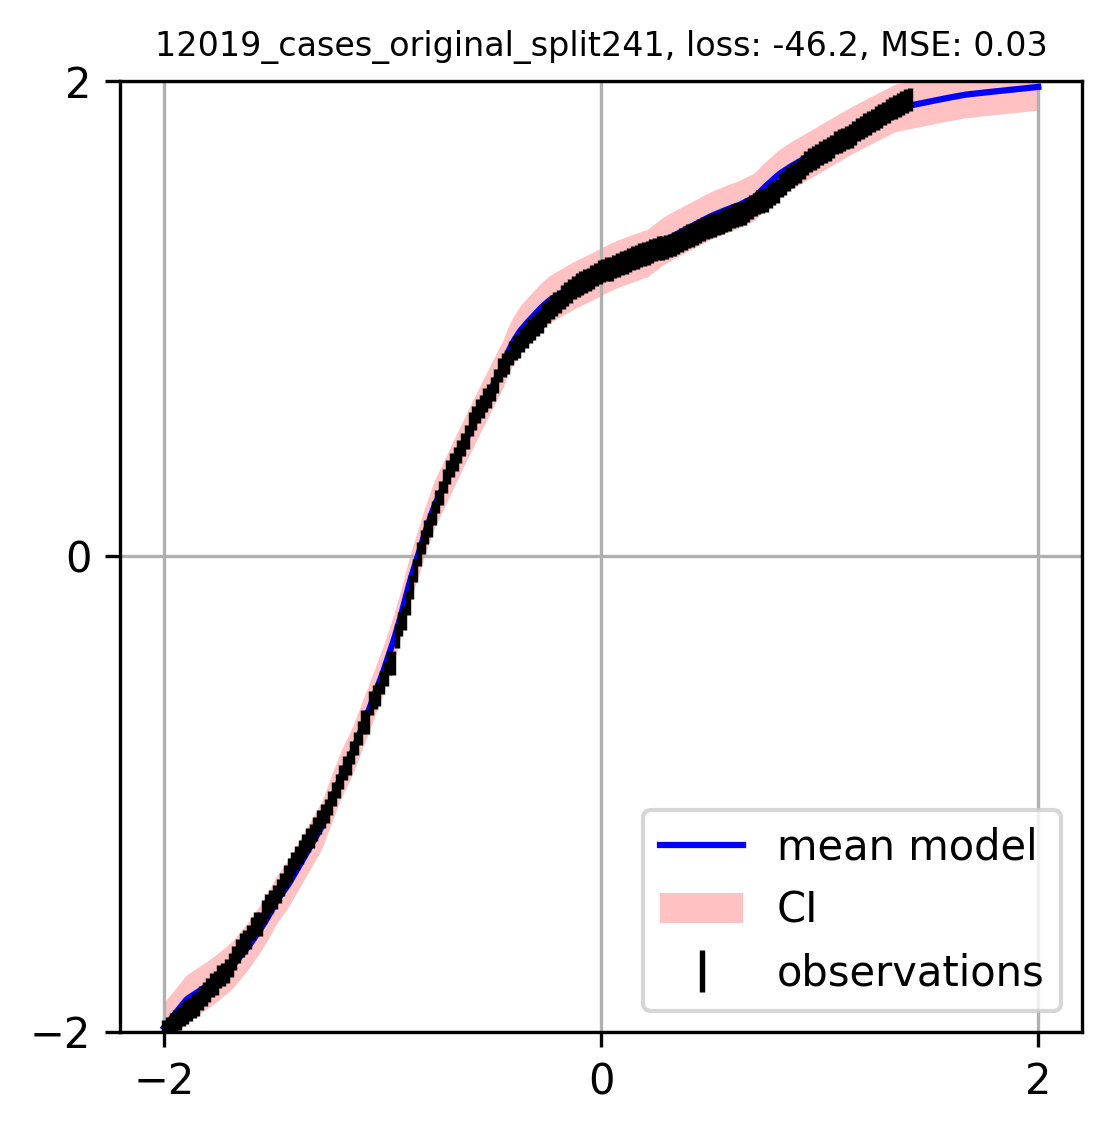

In [9]:
#plotting the test data
testMetrics=prp.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function, device)
# saving test metrics
save_Test_Metrics=prp.save_test_metrics(OUTPUT_PATH, testMetrics)

In [ ]:
#plotting the train data
trainMetrics=prp.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function, device)
# saving test metrics
save_Train_Metrics=prp.save_train_metrics(OUTPUT_PATH, trainMetrics)

In [ ]:
#plotting the train data
valMetrics=prp.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function, device)
# saving test metrics
save_Val_Metrics=prp.save_val_metrics(OUTPUT_PATH, valMetrics)